## 1) 각 구별(지역) 확진자 발생 추이를 꺾은선 그래프로 주단위로 출력하시오.

In [13]:
# Pandas 라이브러리 불러오기
import pandas as pd

# numpy 라이브러리 불러오기
import numpy as np

# matplotlib 라이브러리 불러오기
from matplotlib import pyplot as plt

In [14]:
df = pd.read_excel('전공_파이썬데이터분석과제_이름_ID.xlsx', sheet_name = 2)
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,108135,2021-10-10,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,-,NaN,2021-10-11 10:57:57,2021-10-11 10:57:57,Y
1,108134,2021-10-10,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,-,NaN,2021-10-11 10:57:57,2021-10-11 10:57:57,Y
2,108133,2021-10-10,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,-,NaN,2021-10-11 10:57:57,2021-10-11 10:57:57,Y
3,108132,2021-10-10,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-10-11 10:57:57,2021-10-11 10:57:57,Y
4,108131,2021-10-10,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,-,NaN,2021-10-11 10:57:57,2021-10-11 10:57:57,Y


In [15]:
# 1번 solution
# datetime 컬럼 새로 생성
df['datetime'] = df['확진일'].apply(lambda x: pd.to_datetime(str(x), format = '%Y-%m-%d', errors='raise'))
df.set_index(df['datetime'], inplace=True)

In [16]:
# sum을 위한 카운트 칼럼
df['count'] = 1
# df.info()

In [17]:
# datetime에는 각 주의 끝나는 시간이 표시됨
sorted_series = df.groupby(['지역', pd.Grouper(key = 'datetime', freq = 'W')])['count'].sum()

In [18]:
sorted_df = pd.DataFrame(sorted_series, columns=['count'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from c

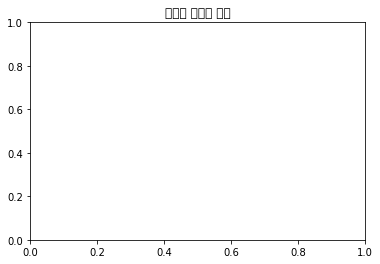

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from c

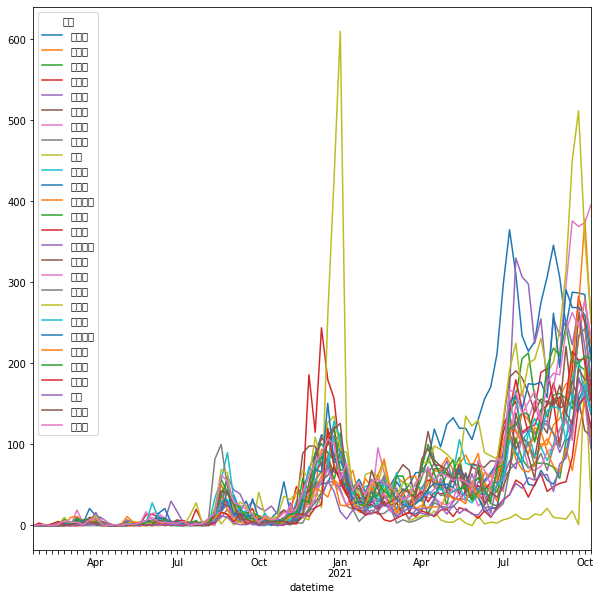

In [20]:
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# rc('font', family='NamumGothic')
# plt.rc['font.family']='SeoulNamsan'
plt.rcParams['axes.unicode_minus'] = False
plt.title('서울시 확진자 현황')
table = sorted_df.pivot_table(values = 'count', index='datetime', columns='지역', fill_value =0)

# x축 생성
x_data = pd.date_range(min(df['datetime']),max(df['datetime']),freq='w')
ax=table.plot(figsize=(10,10))
ax.set_xticks(x_data)